(a) Function to Create Preference Lists for Men and Women
This function takes the number of participants
𝑛
n (for both men and women) and randomly generates preference lists for both men and women.

Preference Generation Process



• Initial block sets up empty dictionaries for preference lists.

• Men and Women List Generation generates lists of men's and women's IDs.
• For Men, a randomly shuffled list of women is assigned to each man.

• For Women, a random list of men is created for each woman.
• Random.sample() ensures preferences are in a different order each time.

• Preferences are returned for use in the next step of matching.




In [19]:
import random

def create_preference_lists(n):
    # Create dictionaries to hold the preference lists for men and women
    men_preferences = {}
    women_preferences = {}

    # Generate a list of men (m1, m2, ..., mn) and women (w1, w2, ..., wn)
    men = [f"m{i}" for i in range(1, n+1)]
    women = [f"w{i}" for i in range(1, n+1)]

    # For each man, randomly generate a preference list of women
    for man in men:
        men_preferences[man] = random.sample(women, n)  # Random order of all women

    # For each woman, randomly generate a preference list of men
    for woman in women:
        women_preferences[woman] = random.sample(men, n)  # Random order of all men

    # Return the complete preference lists for men and women
    return men_preferences, women_preferences

# Example usage: Generate preferences for 10 men and women
men_prefs, women_prefs = create_preference_lists(10)
print("Men's Preferences:", men_prefs)
print("Women's Preferences:", women_prefs)


Men's Preferences: {'m1': ['w7', 'w5', 'w6', 'w2', 'w4', 'w1', 'w10', 'w9', 'w8', 'w3'], 'm2': ['w3', 'w8', 'w6', 'w10', 'w2', 'w1', 'w5', 'w7', 'w9', 'w4'], 'm3': ['w5', 'w10', 'w1', 'w7', 'w9', 'w6', 'w2', 'w8', 'w3', 'w4'], 'm4': ['w9', 'w2', 'w5', 'w1', 'w8', 'w3', 'w10', 'w6', 'w7', 'w4'], 'm5': ['w5', 'w9', 'w7', 'w2', 'w8', 'w3', 'w6', 'w4', 'w1', 'w10'], 'm6': ['w4', 'w1', 'w7', 'w6', 'w5', 'w3', 'w8', 'w10', 'w9', 'w2'], 'm7': ['w8', 'w4', 'w3', 'w5', 'w10', 'w2', 'w6', 'w9', 'w7', 'w1'], 'm8': ['w2', 'w4', 'w1', 'w8', 'w10', 'w9', 'w5', 'w6', 'w7', 'w3'], 'm9': ['w7', 'w4', 'w1', 'w3', 'w8', 'w2', 'w10', 'w5', 'w6', 'w9'], 'm10': ['w2', 'w6', 'w3', 'w5', 'w4', 'w8', 'w9', 'w1', 'w7', 'w10']}
Women's Preferences: {'w1': ['m9', 'm7', 'm1', 'm8', 'm3', 'm4', 'm5', 'm10', 'm6', 'm2'], 'w2': ['m7', 'm8', 'm6', 'm2', 'm10', 'm1', 'm4', 'm5', 'm9', 'm3'], 'w3': ['m2', 'm1', 'm6', 'm10', 'm4', 'm9', 'm8', 'm3', 'm5', 'm7'], 'w4': ['m8', 'm1', 'm7', 'm5', 'm3', 'm2', 'm9', 'm6', 'm10'

(b) Function to Check for Unstable Pairs
This function verifies whether any pair in a given matching is unstable by comparing their preferences.



*Matching Process Overview

• First For Loop: Checks satisfaction with current partner or preference for someone else.

• Getting Current Woman's Rank: Determines the current woman's ranking in the man's preference list.
• Checking Preferred Women: Loops through women the man prefers more than his current match.

• Is She Matched?: Checks if the woman the man prefers is already paired with someone else.

• Finding Her Current Partner: Determines if she is matched.

• Does She Prefer This Man?: Checks if the woman also prefers this man over her current partner.

• Returns True if Unstable: If one unstable pair is found, the matching is unstable.

• Returns False if Stable: If no unstable pairs are found, the matching is stable.




In [20]:
def is_unstable_pair(matching, men_preferences, women_preferences):
    # Loop through each man and his current matched woman in the given matching
    for man, woman in matching.items():
        # Get the index of the current woman in this man's preference list
        man_index = men_preferences[man].index(woman)

        # Check if the man prefers any woman over his current match
        for preferred_woman in men_preferences[man][:man_index]:  # Only consider women ranked higher than the current match
            # Check if this preferred woman is already matched
            if preferred_woman in [w for m, w in matching.items()]:
                # Find the man who is currently matched with this preferred woman
                current_partner = [m for m, w in matching.items() if w == preferred_woman][0]

                # Check if this preferred woman prefers the current man (who likes her more) over her current partner
                if women_preferences[preferred_woman].index(man) < women_preferences[preferred_woman].index(current_partner):
                    # Unstable pair found if both man and woman prefer each other over their current partners
                    return True
    # If no unstable pairs are found, return False
    return False

# Example usage
matching = {'m1': 'w3', 'm2': 'w1', 'm3': 'w2'}
print("Is unstable pair:", is_unstable_pair(matching, men_prefs, women_prefs))


Is unstable pair: True


(c) Gale-Shapley Algorithm Implementation
The Gale-Shapley algorithm finds a stable marriage assignment by having men propose to women based on their preferences, and women accept or reject proposals.

Algorithm Overview:

• Initialization: Stores all unengaged men.

• Engagement: Stores the final result of each man's engagement.

• Women_partners: Tracks each woman's current partner.

• Men_proposals: Tracks which women each man has proposed to.

• Main Loop: Runs while there are free men left.

• Proposal Process: Each free man proposes to the first unengaged woman in his list.

• If the woman is engaged, she breaks up with her current partner and engages with the new man.

• If she prefers the new man, she rejects the new man's proposal.

• Breaking Engagements: If a woman switches partners, her previous partner becomes free and is added back to the free_men list.

• End Condition: Loop ends when there are no free men left, and the final set of stable pairs is returned.

In [21]:
import time

def gale_shapley(men_preferences, women_preferences):
    # Get the number of participants (n men, n women)
    n = len(men_preferences)

    # Initialize a list of all men who are free (i.e., still need to propose)
    free_men = list(men_preferences.keys())

    # Dictionary to store the engaged pairs (man -> woman)
    engaged = {}

    # Dictionary to track current partners of all women (initially no partners)
    women_partners = {woman: None for woman in women_preferences}

    # Dictionary to track proposals each man has made to women (to avoid proposing to the same woman twice)
    men_proposals = {man: [] for man in men_preferences}

    # The while loop runs until all men are engaged (i.e., no free men left)
    while free_men:
        # Take the first free man in the list
        man = free_men.pop(0)

        # Get this man's list of preferred women
        man_prefs = men_preferences[man]

        # Iterate through the man's preference list and propose to women one by one
        for woman in man_prefs:
            # Check if the man hasn't proposed to this woman yet
            if woman not in men_proposals[man]:
                # Record that the man has now proposed to this woman
                men_proposals[man].append(woman)

                # If the woman is currently not engaged, engage the man and woman
                if women_partners[woman] is None:
                    engaged[man] = woman
                    women_partners[woman] = man
                    break  # The man is now engaged, so stop proposing

                # If the woman is already engaged, compare the current engagement with the new proposal
                else:
                    current_partner = women_partners[woman]
                    # If the woman prefers the new man over her current partner
                    if women_preferences[woman].index(man) < women_preferences[woman].index(current_partner):
                        # The woman breaks off her current engagement
                        free_men.append(current_partner)  # The dumped man is now free

                        # Engage the new man with the woman
                        engaged[man] = woman
                        women_partners[woman] = man
                        break  # The man is now engaged, so stop proposing
                    else:
                        # If the woman rejects the proposal, the man moves on to the next woman
                        continue

    # Return the final set of engaged pairs (man -> woman)
    return engaged

# Example usage
engaged_pairs = gale_shapley(men_prefs, women_prefs)
print("Engaged Pairs:", engaged_pairs)



Engaged Pairs: {'m1': 'w7', 'm2': 'w3', 'm3': 'w5', 'm4': 'w10', 'm5': 'w4', 'm6': 'w6', 'm7': 'w8', 'm8': 'w2', 'm9': 'w1', 'm10': 'w9'}


Gale-Shapley Algorithm Overview

• Creating Input Files: Creates randomized preference lists for participants and saves them to files.

• Loading Preferences: Reads saved preference lists from a file for algorithm runs.

• Measuring Run Time: Runs the algorithm multiple times per input file to observe performance with different inputs.

• Plotting Results: Generates a plot showing each run's duration, useful for identifying performance trends or anomalies.

Run times with different input files: [3.409385681152344e-05, 2.09808349609375e-05, 2.8371810913085938e-05, 1.811981201171875e-05, 3.361701965332031e-05]


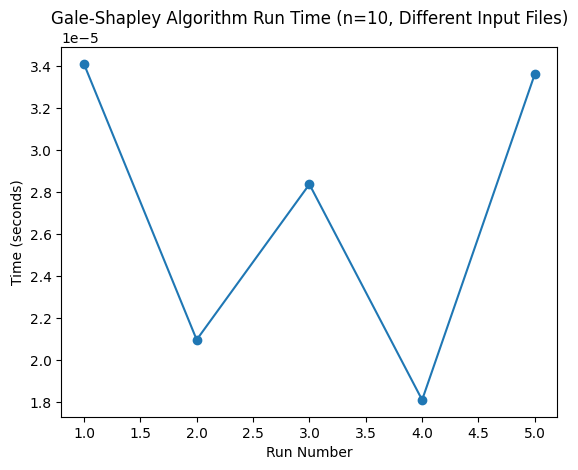

In [27]:
import time
import matplotlib.pyplot as plt

# Creates and saves input files with random preference lists for men and women.
# Useful for testing the algorithm with different sets of preferences.
def create_and_save_inputs(num_files, n):
    for i in range(1, num_files + 1):
        men_prefs, women_prefs = create_preference_lists(n)  # Generate random preferences
        with open(f'input_{i}.txt', 'w') as f:  # Save preferences to a file
            f.write(f"{n}\n")  # Write the number of participants
            # Save each man's preferences
            for man, prefs in men_prefs.items():
                f.write(f"{man}: {', '.join(prefs)}\n")
            # Save each woman's preferences
            for woman, prefs in women_prefs.items():
                f.write(f"{woman}: {', '.join(prefs)}\n")

# Creates 5 different input files, each with 10 participants.
n = 10
num_files = 5
create_and_save_inputs(num_files, n)

# Loads men's and women's preferences from a file.
# This allows us to test Gale-Shapley with preset preference lists.
def load_preferences(file_name):
    men_prefs = {}
    women_prefs = {}
    with open(file_name, 'r') as f:
        lines = f.readlines()
        n = int(lines[0].strip())  # Read the number of participants (first line)
        # Read men's preferences (lines 2 to n+1)
        for i in range(1, n + 1):
            man, prefs = lines[i].split(": ")
            men_prefs[man] = prefs.strip().split(", ")  # Store preferences as a list
        # Read women's preferences (lines n+2 to 2n+1)
        for i in range(n + 1, 2 * n + 1):
            woman, prefs = lines[i].split(": ")
            women_prefs[woman] = prefs.strip().split(", ")  # Store preferences as a list
    return men_prefs, women_prefs

# Measures the runtime of Gale-Shapley for multiple input files.
# Each run uses a different set of preferences to observe how time varies.
def run_with_different_files(num_files):
    times = []

    for i in range(1, num_files + 1):
        men_prefs, women_prefs = load_preferences(f'input_{i}.txt')  # Load preferences
        start_time = time.time()  # Start the timer
        gale_shapley(men_prefs, women_prefs)  # Run the Gale-Shapley algorithm
        end_time = time.time()  # Stop the timer
        times.append(end_time - start_time)  # Calculate and store the runtime

    return times

# Run Gale-Shapley algorithm 5 times with different input files.
run_times = run_with_different_files(num_files)
print("Run times with different input files:", run_times)

# Plot the runtimes to visualize how the performance varies across different inputs.
plt.plot(range(1, num_files + 1), run_times, marker='o')
plt.xlabel("Run Number")  # Label for the x-axis
plt.ylabel("Time (seconds)")  # Label for the y-axis
plt.title("Gale-Shapley Algorithm Run Time (n=10, Different Input Files)")  # Chart title
plt.show()


(d) Running the Algorithm 5 Times for
𝑛
=
10
n=10 with the Same Input
You can reuse the preference lists created in part (a) and run the algorithm 5 times, recording the time taken for each run.

Gale-Shapley Algorithm Run Multiple Times Function
• Executes the algorithm multiple times, defaulting to 5 runs.

• Measures time before and after each run, appending the difference to the times list.

• Runs the algorithm 5 times using same input preferences for both genders.

• Generates a plot to visualize performance variation across runs, with each point representing the time taken for a specific run.

Run times: [6.67572021484375e-05, 3.886222839355469e-05, 4.1484832763671875e-05, 3.647804260253906e-05, 3.695487976074219e-05]


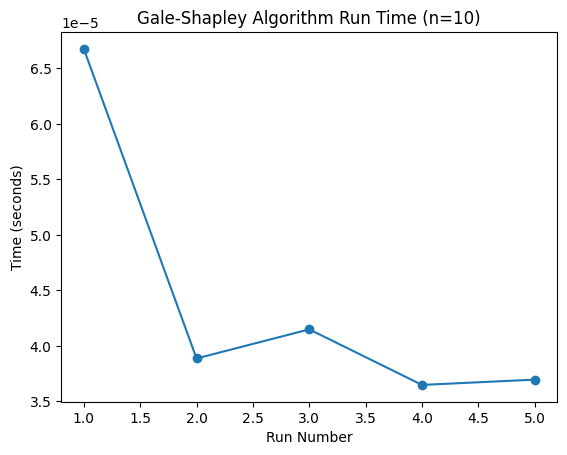

In [23]:
import time
import matplotlib.pyplot as plt

# Function to run the Gale-Shapley algorithm multiple times
# Tracks the execution time for each run
def run_multiple_times(men_preferences, women_preferences, num_runs=5):
    times = []  # Store run times for each execution

    for _ in range(num_runs):
        start_time = time.time()  # Start timer
        gale_shapley(men_preferences, women_preferences)  # Run the Gale-Shapley algorithm
        end_time = time.time()  # Stop timer
        times.append(end_time - start_time)  # Calculate and save the time taken for this run

    return times

# Running Gale-Shapley 5 times with the same input preferences for consistency
run_times = run_multiple_times(men_prefs, women_prefs)
print("Run times:", run_times)  # Display the run times

# Plotting the run times to visualize performance across runs
plt.plot(range(1, 6), run_times, marker='o')  # Plot the times with markers for each run
plt.xlabel("Run Number")  # Label for x-axis
plt.ylabel("Time (seconds)")  # Label for y-axis
plt.title("Gale-Shapley Algorithm Run Time (n=10)")  # Title of the plot
plt.show()  # Display the plot


(e) Running for Different Input Sizes
You can generate random preference lists for different input sizes
𝑛
=
10
,
15
,
20
,
50
,
100
n=10,15,20,50,100 and record the average running time over 5 runs for each size.

Gale-Shapley Algorithm Testing and Plotting

• Runs the Gale-Shapley algorithm for different input sizes (n).

• Creates random preference lists for each size and runs the algorithm multiple times.

• Calculates average runtime for each size and adds it to the avg_times list.

• Tests the performance of the algorithm with different input sizes by increasing n.

• Generates a plot to visualize the relationship between input size and the algorithm's average runtime.

• Provides insights into the algorithm's scalability.

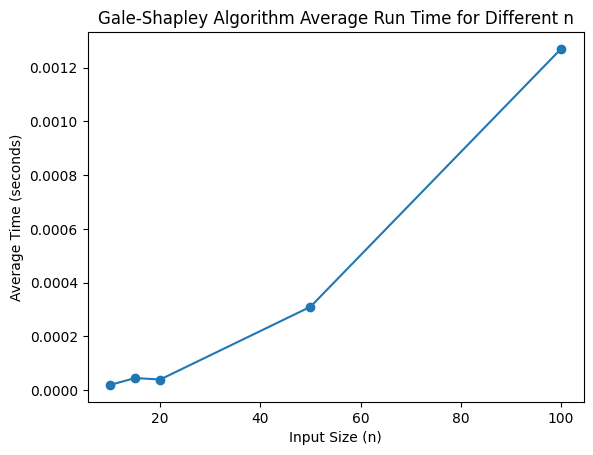

In [24]:
def run_for_different_n(sizes):
    avg_times = []  # List to store the average time for each input size

    # Iterate over different sizes (n)
    for n in sizes:
        # Generate random preference lists for men and women of size n
        men_prefs, women_prefs = create_preference_lists(n)

        # Run the Gale-Shapley algorithm multiple times and get the run times
        times = run_multiple_times(men_prefs, women_prefs)

        # Calculate the average time for this input size and store it
        avg_times.append(sum(times) / len(times))

    return avg_times  # Return the list of average times

# Define different input sizes to test the algorithm's performance
sizes = [10, 15, 20, 50, 100]

# Run the algorithm for each size and get the average times
avg_times = run_for_different_n(sizes)

# Plot the average times for different input sizes
plt.plot(sizes, avg_times, marker='o')  # Plot with markers for clarity
plt.xlabel("Input Size (n)")  # Label for x-axis
plt.ylabel("Average Time (seconds)")  # Label for y-axis
plt.title("Gale-Shapley Algorithm Average Run Time for Different n")  # Title of the plot
plt.show()  # Display the plot


(f) Running with Different Proposers
This function allows different men to start proposing first and outputs the matches generated for each run.

Gale-Shapley Algorithm Function Overview

• Runs the Gale-Shapley algorithm multiple times to observe the impact of proposal order on final matchings.

• Extracts men's list from men_preferences dictionary for initial proposal order.

• Involves a for loop that iterates for specified runs, changing the order of men proposing.

• Creates men_reordered dictionary to simulate different starting points for the proposing process.

• Creates men_preferences_reordered dictionary reflecting the changed proposing order.

• Calls the gale_shapley function with reordered preferences, storing matched pairs in engaged_pairs.

• Displays the starting proposal order and resulting engaged pairs for each run.

In [25]:
def run_with_different_proposers(men_preferences, women_preferences, num_runs=5):
    men = list(men_preferences.keys())  # Get the list of men from preferences

    # Loop for the specified number of runs
    for i in range(num_runs):
        # Rearrange the proposing order of men for each run
        men_reordered = men[i:] + men[:i]  # Shift the list to change the starting proposer
        # Create a reordered version of the men's preferences based on the new order
        men_preferences_reordered = {man: men_preferences[man] for man in men_reordered}

        # Run the Gale-Shapley algorithm with the reordered preferences
        engaged_pairs = gale_shapley(men_preferences_reordered, women_preferences)

        # Print the results for the current run
        print(f"Run {i+1} with {men_reordered[0]} starting:")  # Indicate which man is starting
        print(engaged_pairs)  # Show the engaged pairs from this run

# Running the Gale-Shapley algorithm with different proposing orders
run_with_different_proposers(men_prefs, women_prefs)


Run 1 with m1 starting:
{'m1': 'w7', 'm2': 'w3', 'm3': 'w5', 'm4': 'w10', 'm5': 'w4', 'm6': 'w6', 'm7': 'w8', 'm8': 'w2', 'm9': 'w1', 'm10': 'w9'}
Run 2 with m2 starting:
{'m2': 'w3', 'm3': 'w5', 'm4': 'w10', 'm5': 'w4', 'm6': 'w6', 'm7': 'w8', 'm8': 'w2', 'm9': 'w1', 'm10': 'w9', 'm1': 'w7'}
Run 3 with m3 starting:
{'m3': 'w5', 'm4': 'w10', 'm5': 'w4', 'm6': 'w6', 'm7': 'w8', 'm8': 'w2', 'm9': 'w1', 'm10': 'w9', 'm1': 'w7', 'm2': 'w3'}
Run 4 with m4 starting:
{'m4': 'w10', 'm5': 'w4', 'm6': 'w6', 'm7': 'w8', 'm8': 'w2', 'm9': 'w1', 'm10': 'w9', 'm1': 'w7', 'm2': 'w3', 'm3': 'w5'}
Run 5 with m5 starting:
{'m5': 'w4', 'm6': 'w6', 'm7': 'w8', 'm8': 'w2', 'm9': 'w1', 'm10': 'w9', 'm1': 'w7', 'm2': 'w3', 'm3': 'w5', 'm4': 'w10'}
